In [2]:
import json
import pandas as pd
from pathlib import Path
from datetime import datetime




data = pd.read_excel("./demo.xlsx")

# print(data.head())
print(data.info())
print(data.describe())

bianmas = data.value_counts(["wupinbianma", "wupinmingcheng"]).head(20).reset_index()["wupinbianma"]

data = data[data["wupinbianma"].isin(bianmas)].reset_index(drop=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80978 entries, 0 to 80977
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yewuriqi        80978 non-null  object 
 1   wupinbianma     80978 non-null  object 
 2   wupinmingcheng  80978 non-null  object 
 3   kucundanwei     80978 non-null  object 
 4   caigoushuliang  80978 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.1+ MB
None
       caigoushuliang
count    80978.000000
mean      1171.161752
std       6447.782001
min          0.000000
25%         12.000000
50%        155.000000
75%        778.000000
max     293076.000000


In [6]:
data = data.rename(columns={
    "yewuriqi": "Date",
    "wupinbianma": "Code",
    "wupinmingcheng": "Name",
    "kucundanwei": "unit",
    "caigoushuliang": "quantity",
})
data.columns = [i.lower() for i in data.columns]
data

,date,code,name,unit,quantity
0,2024-06-22,01.01.0019,13#火锅油料包600g,袋,43.0
1,2024-06-22,01.01.0523,合918火锅红油500g,袋,1452.0
2,2024-06-22,01.01.0524,合918火锅底料500g,袋,2479.0
3,2024-06-22,01.01.0544,【酵父】1 #火锅红油500g,袋,2151.0
4,2024-06-22,01.01.0548,【酵父】1 #火锅底料500g,袋,1697.0
...,...,...,...,...,...
3225,2024-12-18,01.02.0158,合香辣烤鱼料500g,袋,414.0
3226,2024-12-18,01.03.0105,利| 2#番茄料包500g,袋,1216.0
3227,2024-12-18,01.04.0008,豆豉酱500g,袋,47.0
3228,2024-12-18,01.05.0004,3#牛油调味粉50g,袋,46005.0


In [ ]:
data = data.rename(columns={
    "yewuriqi": "date",
    "wupinbianma": "code",
    "wupinmingcheng": "name",
    "kucundanwei": "unit",
    "caigoushuliang": "quantity",
})

In [51]:
data

,date,code,name,unit,quantity
0,2024-06-22,01.01.0019,13#火锅油料包600g,袋,43.0
1,2024-06-22,01.01.0523,合918火锅红油500g,袋,1452.0
2,2024-06-22,01.01.0524,合918火锅底料500g,袋,2479.0
3,2024-06-22,01.01.0544,【酵父】1 #火锅红油500g,袋,2151.0
4,2024-06-22,01.01.0548,【酵父】1 #火锅底料500g,袋,1697.0
...,...,...,...,...,...
3225,2024-12-18,01.02.0158,合香辣烤鱼料500g,袋,414.0
3226,2024-12-18,01.03.0105,利| 2#番茄料包500g,袋,1216.0
3227,2024-12-18,01.04.0008,豆豉酱500g,袋,47.0
3228,2024-12-18,01.05.0004,3#牛油调味粉50g,袋,46005.0


In [52]:
data.to_excel("demo_ok.xlsx")

In [35]:
data_ = data[["date", "code", "quantity"]]
data_["date"] = pd.to_datetime(data_["date"])
data_.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7184\3517265203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_["date"] = pd.to_datetime(data_["date"])


,date,code,quantity
0,2024-06-22,01.01.0019,43.0
1,2024-06-22,01.01.0523,1452.0
2,2024-06-22,01.01.0524,2479.0
3,2024-06-22,01.01.0544,2151.0
4,2024-06-22,01.01.0548,1697.0


In [36]:
data_2 = data_.pivot(index="date", columns="code", values="quantity").interpolate()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2024-06-22 to 2024-12-18
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   01.01.0019  162 non-null    float64
 1   01.01.0523  162 non-null    float64
 2   01.01.0524  162 non-null    float64
 3   01.01.0544  162 non-null    float64
 4   01.01.0548  162 non-null    float64
 5   01.01.0562  162 non-null    float64
 6   01.01.0577  162 non-null    float64
 7   01.01.0582  162 non-null    float64
 8   01.01.0592  162 non-null    float64
 9   01.01.0594  162 non-null    float64
 10  01.02.0018  162 non-null    float64
 11  01.02.0047  162 non-null    float64
 12  01.02.0154  162 non-null    float64
 13  01.02.0155  162 non-null    float64
 14  01.02.0157  162 non-null    float64
 15  01.02.0158  162 non-null    float64
 16  01.03.0105  162 non-null    float64
 17  01.04.0008  162 non-null    float64
 18  01.05.0004  162 non-null    float64
 19  01.05.0060

In [48]:
# data_2.plot()

<Axes: xlabel='date'>

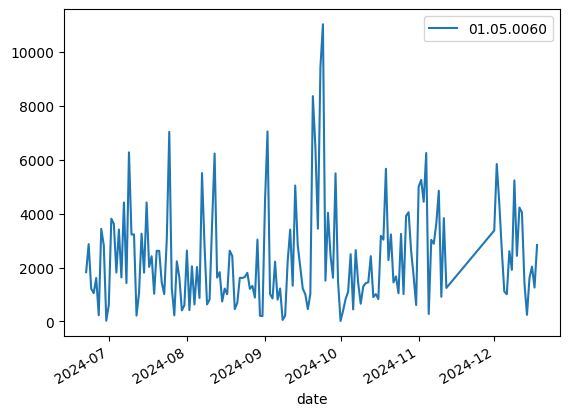

In [49]:
data_2.iloc[:, 19].plot(legend=True)

<Axes: xlabel='date'>

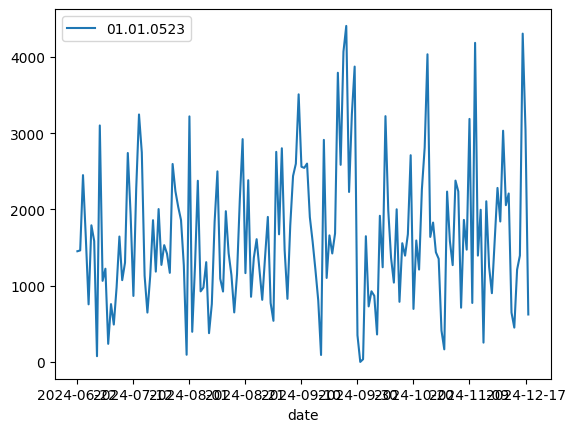

In [25]:
data_2.iloc[:, 1].plot(legend=True)

In [74]:
import pandas as pd
from config.config import Config
from datetime import datetime, timedelta
from copy import deepcopy

In [75]:
old_data = pd.read_excel("./demo_ok.xlsx")
old_data.head()
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      3230 non-null   object
 1   code      3230 non-null   object
 2   name      3230 non-null   object
 3   unit      3230 non-null   object
 4   quantity  3230 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 126.3+ KB


In [76]:
# new_data = old_data.tail(5).reset_index(drop=True)
# new_data.loc[5] = ["2024-12-19", 888]
# new_data.loc[6] = ["2024-12-20", 888]
# new_data.loc[7] = ["2024-12-21", 888]
# new_data

In [ ]:
new_data = old_data[old_data["date"]=="2024-12-17"]

news = []
date = datetime.strptime(new_data.date.unique().item(), "%Y-%m-%d")
for i in range(5):
    date: datetime = date + timedelta(days=1)
    new_data["date"] = date.strftime("%Y-%m-%d")
    news.append(deepcopy(new_data))

a = pd.concat(news, ignore_index=True)
a.date.unique()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24304\3981944690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["date"] = date.strftime("%Y-%m-%d")


array(['2024-12-18', '2024-12-19', '2024-12-20', '2024-12-21',
       '2024-12-22'], dtype=object)

In [73]:
a = pd.concat([old_data, new_data], ignore_index=True).drop_duplicates().sort_values("date", ascending=True).reset_index(drop=True)
a.tail(15)

,date,quantity
149,2024-12-07,628
150,2024-12-08,203
151,2024-12-09,5
152,2024-12-10,443
153,2024-12-11,1076
154,2024-12-12,856
155,2024-12-13,278
156,2024-12-14,209
157,2024-12-15,199
158,2024-12-16,555


In [35]:
a = pd.concat([old_data, new_data], ignore_index=True).sort_values("date", ascending=True).tail(15)
a = a.drop_duplicates()
a

,date,quantity
154,2024-12-12,856
155,2024-12-13,278
156,2024-12-14,209
157,2024-12-15,199
163,2024-12-16,555
159,2024-12-17,177
165,2024-12-18,1236
166,2024-12-19,512
167,2024-12-20,512
168,2024-12-21,512
